In [119]:
#!/usr/bin/env python3
from opendbc.car.hyundai.values import CAR, HyundaiFlags
from opendbc.car.vehicle_model import VehicleModel
from opendbc.car.hyundai.carcontroller import get_max_angle_delta, get_max_angle
from opendbc.car.hyundai.interface import CarInterface

def get_vm(car_name):
  return VehicleModel(CarInterface.get_non_essential_params(car_name))


In [120]:
# Only platforms not in dashcam mode!
#PLATFORMS = {str(platform): platform for platform in CAR if
#             platform.config.flags & HyundaiFlags.CANFD_ANGLE_STEERING and not CarInterface.get_non_essential_params(str(platform)).dashcamOnly}


PLATFORMS = {str(platform): platform for platform in CAR if platform.config.flags & HyundaiFlags.CANFD_ANGLE_STEERING}

STEER_ANGLE_MAX = 180.
BASELINE_CAR = "GENESIS_GV80_2025"

In [121]:
PLATFORMS

{'HYUNDAI_IONIQ_5_PE': <CAR.HYUNDAI_IONIQ_5_PE>,
 'KIA_EV6_2025': <CAR.KIA_EV6_2025>,
 'KIA_EV9': <CAR.KIA_EV9>,
 'GENESIS_GV70_ELECTRIFIED_2ND_GEN': <CAR.GENESIS_GV70_ELECTRIFIED_2ND_GEN>,
 'GENESIS_GV80_2025': <CAR.GENESIS_GV80_2025>}

In [122]:
import numpy as np
import matplotlib.pyplot as plt

SPEEDS = np.linspace(1, 40, 200)

def compare_max_angle_plot(car_name, baseline_car, only_relevant_angles=True):
    """
    Plot max steering angles vs speed for car_name and baseline,
    then print a numeric comparison table at a lower resolution.
    """
    baseline_vm = get_vm(baseline_car)
    current_vm = get_vm(car_name)

    speeds = []
    baseline_angles = []
    current_angles = []

    for speed in SPEEDS:  # finer resolution for smooth plots
        current_max = get_max_angle(speed, current_vm)
        baseline_max = get_max_angle(speed, baseline_vm)
        if only_relevant_angles and (current_max > STEER_ANGLE_MAX and baseline_max > STEER_ANGLE_MAX):
            continue

        speeds.append(speed)
        baseline_angles.append(baseline_max)
        current_angles.append(current_max)

    plt.figure(figsize=(10, 5))
    plt.plot(speeds, current_angles, label=f"{car_name}", color="blue", linewidth=2)
    plt.plot(speeds, baseline_angles, label=f"{baseline_car} (baseline)", color="gray", linestyle="--", linewidth=2)
    plt.title("Max Steering Angle vs Speed")
    plt.xlabel("Speed (m/s)")
    plt.ylabel("Max Angle (degrees)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print table on fewer points for clarity
    print(f"\n[Max Angle Comparison] {car_name} vs {baseline_car}")
    print(f"{'Speed (m/s)':<12}{'Max Angle':<12}{'Baseline':<12}{'Diff (%)':<12}")
    for speed in np.linspace(1, 40, 10):
        baseline_max_angle = get_max_angle(speed, baseline_vm)
        current_max_angle = get_max_angle(speed, current_vm)

        if only_relevant_angles and current_max_angle > STEER_ANGLE_MAX:
            continue

        angle_diff_pct = ((current_max_angle - baseline_max_angle) / baseline_max_angle) * 100 if baseline_max_angle != 0 else 0
        print(f"{speed:<12.1f}{current_max_angle:<12.2f}{baseline_max_angle:<12.2f}{angle_diff_pct:<12.2f}")

def compare_max_angle_delta_plot(car_name, baseline_car="HYUNDAI_IONIQ_5_PE"):
    """
    Plot max steering angle delta vs speed for car_name and baseline,
    then print numeric comparison table at lower resolution.
    """
    baseline_vm = get_vm(baseline_car)
    current_vm = get_vm(car_name)

    speeds = []
    baseline_deltas = []
    current_deltas = []

    for speed in SPEEDS:
        speeds.append(speed)
        baseline_deltas.append(get_max_angle_delta(speed, baseline_vm))
        current_deltas.append(get_max_angle_delta(speed, current_vm))

    plt.figure(figsize=(10, 5))
    plt.plot(speeds, current_deltas, label=f"{car_name}", color="green", linewidth=2)
    plt.plot(speeds, baseline_deltas, label=f"{baseline_car} (baseline)", color="gray", linestyle="--", linewidth=2)
    plt.title("Max Steering Angle Delta vs Speed")
    plt.xlabel("Speed (m/s)")
    plt.ylabel("Max Delta (deg/frame)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print numeric table
    print(f"\n[Max Angle Delta Comparison] {car_name} vs {baseline_car}")
    print(f"{'Speed (m/s)':<12}{'Max Delta':<12}{'Baseline':<12}{'Diff (%)':<12}")
    for speed in np.linspace(1, 40, 10):
        baseline_max_delta = get_max_angle_delta(speed, baseline_vm)
        current_max_delta = get_max_angle_delta(speed, current_vm)

        delta_diff_pct = ((current_max_delta - baseline_max_delta) / baseline_max_delta) * 100 if baseline_max_delta != 0 else 0
        print(f"{speed:<12.1f}{current_max_delta:<12.4f}{baseline_max_delta:<12.4f}{delta_diff_pct:<12.2f}")


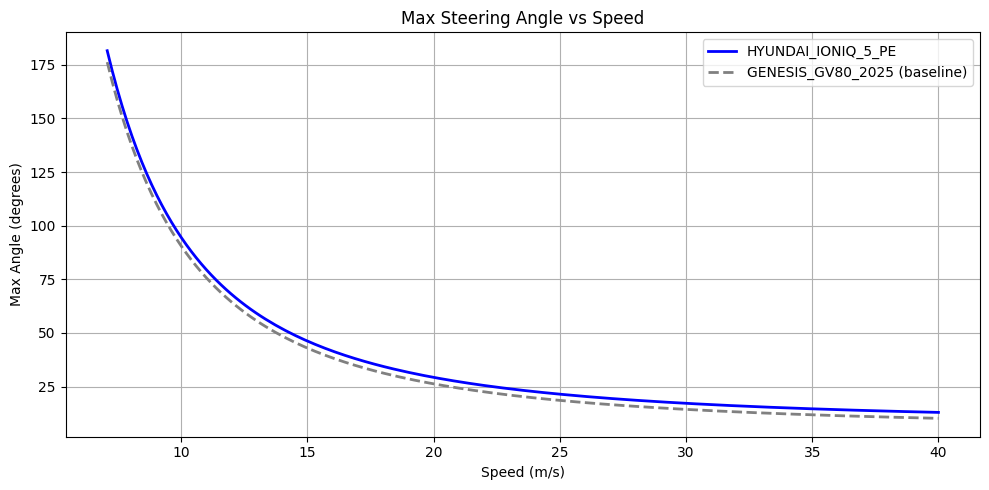


[Max Angle Comparison] HYUNDAI_IONIQ_5_PE vs GENESIS_GV80_2025
Speed (m/s) Max Angle   Baseline    Diff (%)    
9.7         100.76      96.66       4.24        
14.0        51.99       48.64       6.91        
18.3        33.47       30.39       10.14       
22.7        24.52       21.57       13.65       
27.0        19.51       16.64       17.24       
31.3        16.44       13.61       20.74       
35.7        14.41       11.62       24.04       
40.0        13.01       10.24       27.07       
------------------------------------------------------------------------------------------------------------------------


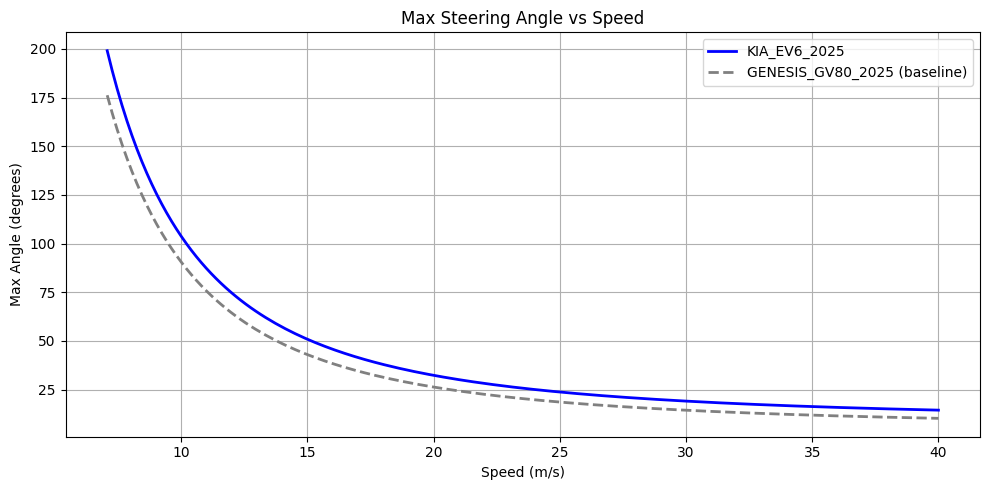


[Max Angle Comparison] KIA_EV6_2025 vs GENESIS_GV80_2025
Speed (m/s) Max Angle   Baseline    Diff (%)    
9.7         110.59      96.66       14.41       
14.0        57.16       48.64       17.54       
18.3        36.87       30.39       21.32       
22.7        27.06       21.57       25.44       
27.0        21.58       16.64       29.65       
31.3        18.21       13.61       33.75       
35.7        15.99       11.62       37.61       
40.0        14.45       10.24       41.17       
------------------------------------------------------------------------------------------------------------------------


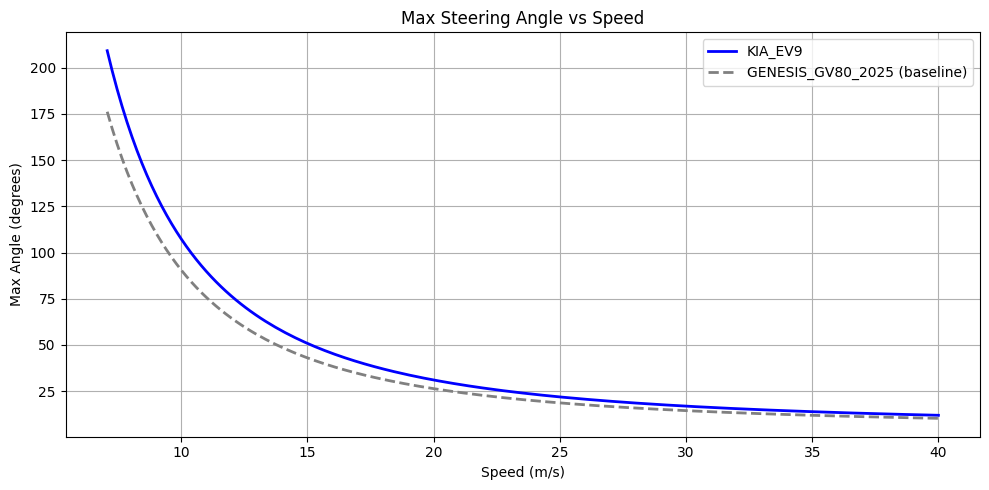


[Max Angle Comparison] KIA_EV9 vs GENESIS_GV80_2025
Speed (m/s) Max Angle   Baseline    Diff (%)    
9.7         114.66      96.66       18.62       
14.0        57.55       48.64       18.33       
18.3        35.86       30.39       17.98       
22.7        25.37       21.57       17.61       
27.0        19.51       16.64       17.22       
31.3        15.91       13.61       16.85       
35.7        13.53       11.62       16.49       
40.0        11.89       10.24       16.17       
------------------------------------------------------------------------------------------------------------------------


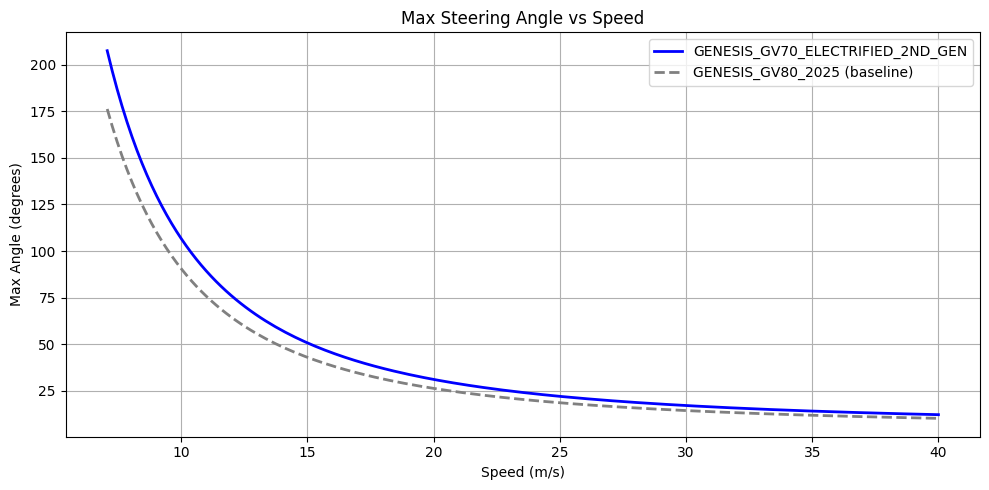


[Max Angle Comparison] GENESIS_GV70_ELECTRIFIED_2ND_GEN vs GENESIS_GV80_2025
Speed (m/s) Max Angle   Baseline    Diff (%)    
9.7         113.88      96.66       17.82       
14.0        57.38       48.64       17.98       
18.3        35.92       30.39       18.18       
22.7        25.54       21.57       18.40       
27.0        19.74       16.64       18.61       
31.3        16.18       13.61       18.83       
35.7        13.83       11.62       19.03       
40.0        12.20       10.24       19.22       
------------------------------------------------------------------------------------------------------------------------


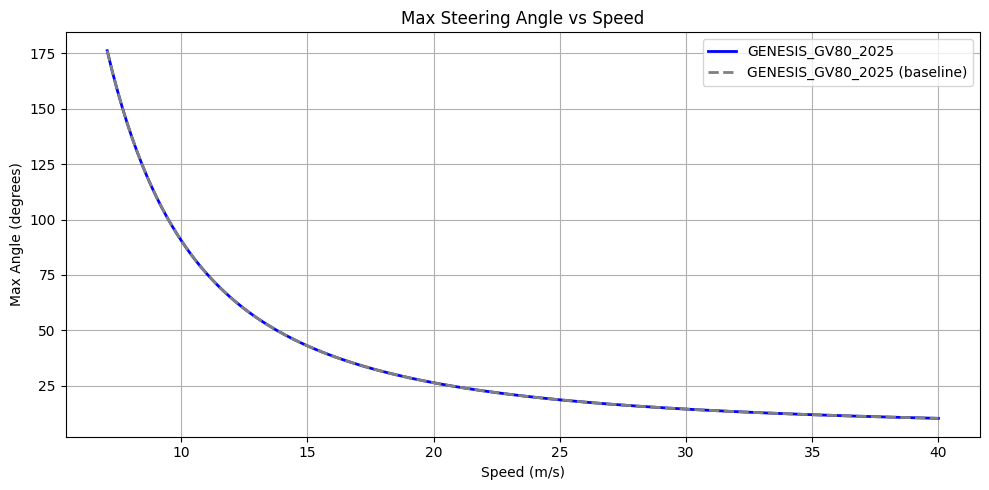


[Max Angle Comparison] GENESIS_GV80_2025 vs GENESIS_GV80_2025
Speed (m/s) Max Angle   Baseline    Diff (%)    
9.7         96.66       96.66       0.00        
14.0        48.64       48.64       0.00        
18.3        30.39       30.39       0.00        
22.7        21.57       21.57       0.00        
27.0        16.64       16.64       0.00        
31.3        13.61       13.61       0.00        
35.7        11.62       11.62       0.00        
40.0        10.24       10.24       0.00        
------------------------------------------------------------------------------------------------------------------------
Comparison complete across 5 Hyundai models with CANFD angle steering support.


In [123]:
for car_name in PLATFORMS:
    compare_max_angle_plot(car_name, BASELINE_CAR, True)
    print("-"*120)
print(f"Comparison complete across {len(PLATFORMS)} Hyundai models with CANFD angle steering support.")

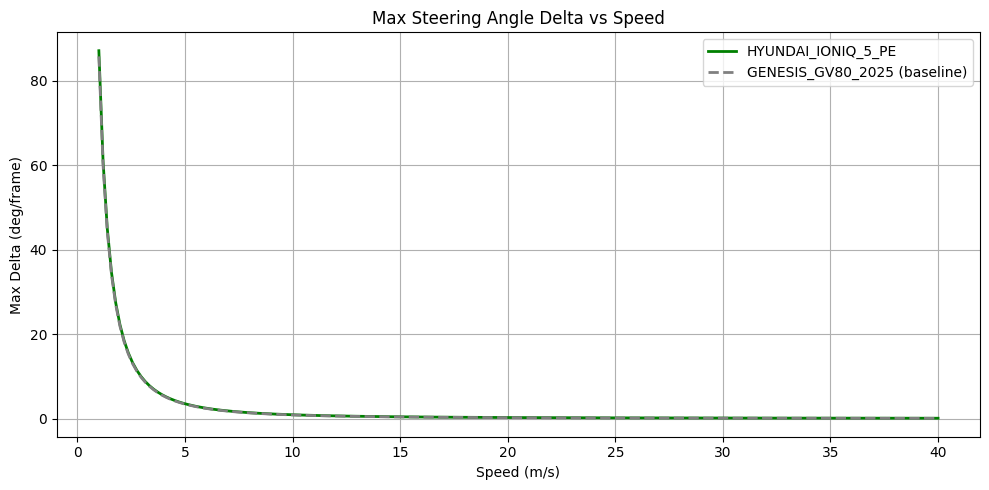


[Max Angle Delta Comparison] HYUNDAI_IONIQ_5_PE vs GENESIS_GV80_2025
Speed (m/s) Max Delta   Baseline    Diff (%)    
1.0         87.1567     85.8155     1.56        
5.3         3.1371      3.0640      2.39        
9.7         1.0076      0.9666      4.24        
14.0        0.5199      0.4864      6.91        
18.3        0.3347      0.3039      10.14       
22.7        0.2452      0.2157      13.65       
27.0        0.1951      0.1664      17.24       
31.3        0.1644      0.1361      20.74       
35.7        0.1441      0.1162      24.04       
40.0        0.1301      0.1024      27.07       


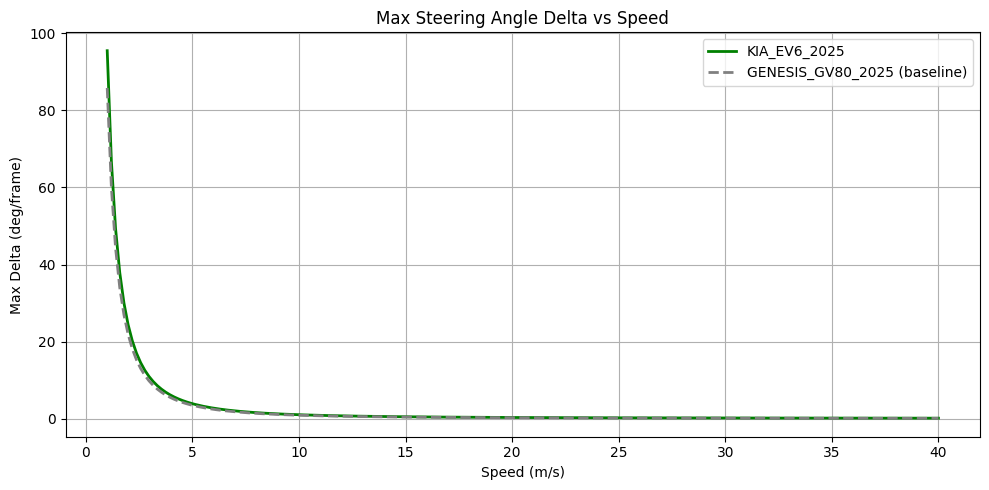


[Max Angle Delta Comparison] KIA_EV6_2025 vs GENESIS_GV80_2025
Speed (m/s) Max Delta   Baseline    Diff (%)    
1.0         95.4887     85.8155     11.27       
5.3         3.4389      3.0640      12.24       
9.7         1.1059      0.9666      14.41       
14.0        0.5716      0.4864      17.54       
18.3        0.3687      0.3039      21.32       
22.7        0.2706      0.2157      25.44       
27.0        0.2158      0.1664      29.65       
31.3        0.1821      0.1361      33.75       
35.7        0.1599      0.1162      37.61       
40.0        0.1445      0.1024      41.17       


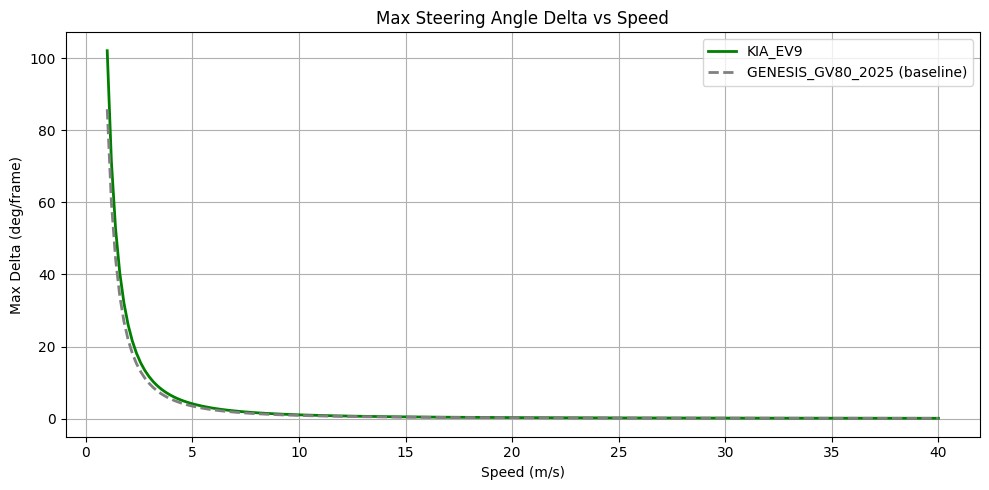


[Max Angle Delta Comparison] KIA_EV9 vs GENESIS_GV80_2025
Speed (m/s) Max Delta   Baseline    Diff (%)    
1.0         102.0385    85.8155     18.90       
5.3         3.6405      3.0640      18.82       
9.7         1.1466      0.9666      18.62       
14.0        0.5755      0.4864      18.33       
18.3        0.3586      0.3039      17.98       
22.7        0.2537      0.2157      17.61       
27.0        0.1951      0.1664      17.22       
31.3        0.1591      0.1361      16.85       
35.7        0.1353      0.1162      16.49       
40.0        0.1189      0.1024      16.17       


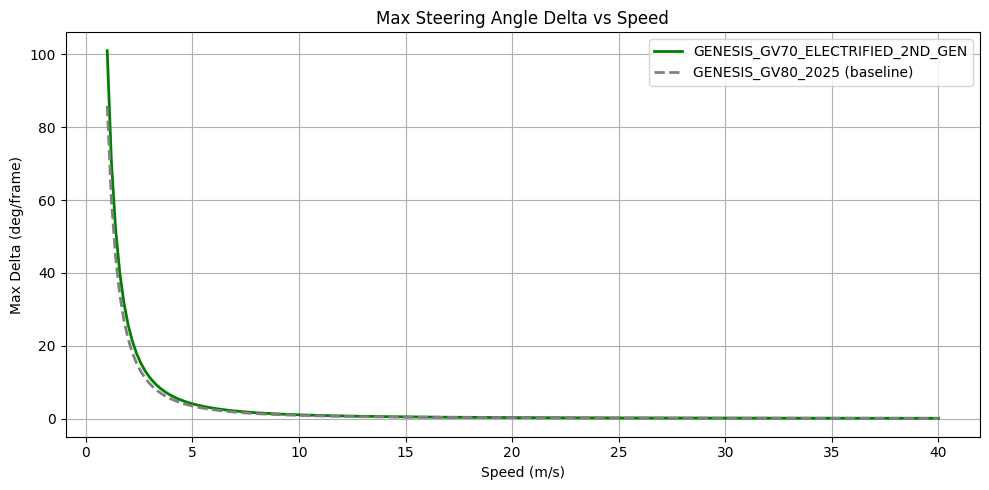


[Max Angle Delta Comparison] GENESIS_GV70_ELECTRIFIED_2ND_GEN vs GENESIS_GV80_2025
Speed (m/s) Max Delta   Baseline    Diff (%)    
1.0         100.9670    85.8155     17.66       
5.3         3.6065      3.0640      17.71       
9.7         1.1388      0.9666      17.82       
14.0        0.5738      0.4864      17.98       
18.3        0.3592      0.3039      18.18       
22.7        0.2554      0.2157      18.40       
27.0        0.1974      0.1664      18.61       
31.3        0.1618      0.1361      18.83       
35.7        0.1383      0.1162      19.03       
40.0        0.1220      0.1024      19.22       


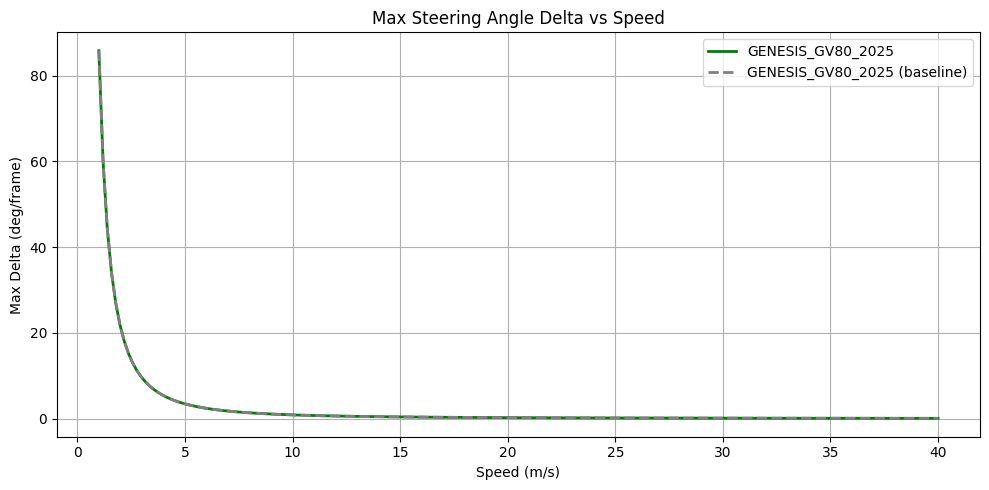


[Max Angle Delta Comparison] GENESIS_GV80_2025 vs GENESIS_GV80_2025
Speed (m/s) Max Delta   Baseline    Diff (%)    
1.0         85.8155     85.8155     0.00        
5.3         3.0640      3.0640      0.00        
9.7         0.9666      0.9666      0.00        
14.0        0.4864      0.4864      0.00        
18.3        0.3039      0.3039      0.00        
22.7        0.2157      0.2157      0.00        
27.0        0.1664      0.1664      0.00        
31.3        0.1361      0.1361      0.00        
35.7        0.1162      0.1162      0.00        
40.0        0.1024      0.1024      0.00        
Comparison complete across 5 Hyundai models with CANFD angle steering support.


In [124]:
for car_name in PLATFORMS:
    compare_max_angle_delta_plot(car_name, BASELINE_CAR)
print(f"Comparison complete across {len(PLATFORMS)} Hyundai models with CANFD angle steering support.")